## Machine Learning Test Cases

## Case 1.1 - Biomedical Device for Parkinson's Disease Progression Monitoring

The dataset used in this test case is the [*Oxford Parkinson's Disease Telemonitoring Dataset*](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring).

**Reference**: A Tsanas, MA Little, PE McSharry, LO Ramig (2009);
'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering (to appear). 

**Import Data and Visualize Table Structure**
The dataset is comprised of 16 biomedical voice measurements taken from 42 patients; approximately 200 measurements were taken per patient.
Vocal impairment after the onset the disease is prevalent in 70 - 90% of the pacients based on some studies.

The aim of the data is to predict the clinician's Parkinson's disease symptom score on the UPDRS (Unified Parkinson's Disease Rating)scale, which reflects .

In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

results = read_csv('parkinsons_updrs.csv')
results.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [2]:
data = [results['motor_UPDRS'].describe(),results['total_UPDRS'].describe()]
df = pd.DataFrame(data)
df.round(2)

,count,mean,std,min,25%,50%,75%,max
motor_UPDRS,5875.0,21.30,8.13,5.04,15.00,20.87,27.6,39.51
total_UPDRS,5875.0,29.02,10.70,7.00,21.37,27.58,36.4,54.99


**Basic Statistics results** suggest: larger variability in the total_UPDRS index.

The objective of the Python code below is just to have other statistical parameters on a single table format.

In [3]:
other_Stats= {'Median': [results['motor_UPDRS'].median(),results['total_UPDRS'].median()], 'Skew':[results['motor_UPDRS'].skew(),
         ...:results['total_UPDRS'].skew()],'Kurtosis':[results['motor_UPDRS'].kurt(), results['total_UPDRS'].kurt()]}
df1 = pd.DataFrame(other_Stats, index=['motor_UPDRS', 'total_UPDRS'])
df1.round(2)

,Kurtosis,Median,Skew
motor_UPDRS,-0.94,20.87,0.08
total_UPDRS,-0.36,27.58,0.27


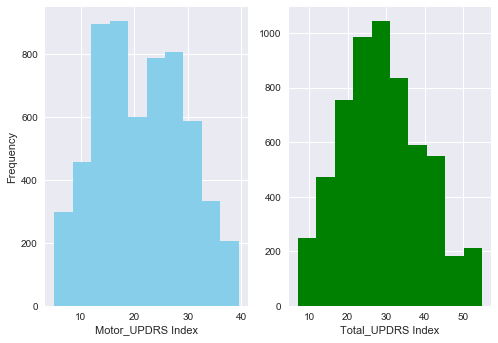

In [4]:
plt.subplot(1, 2, 1)
plt.hist(results["motor_UPDRS"],color = "skyblue")
plt.xlabel('Motor_UPDRS Index')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(results["total_UPDRS"],color = "green")
plt.xlabel('Total_UPDRS Index')
plt.show()

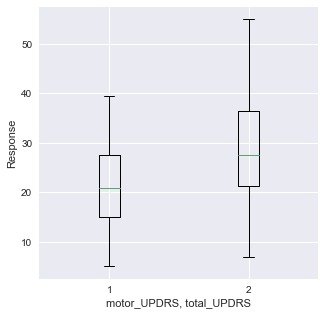

In [5]:
data1 = [results['motor_UPDRS'],results['total_UPDRS']]
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(data1)
ax.set_xlabel('motor_UPDRS, total_UPDRS')
ax.set_ylabel('Response')
plt.show()

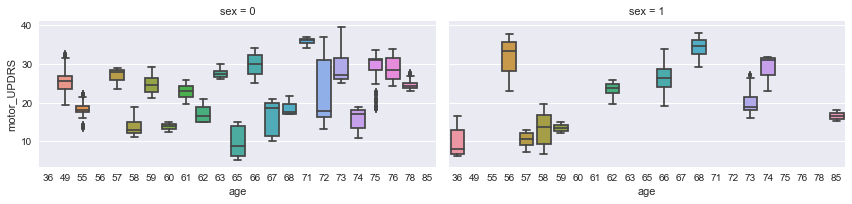

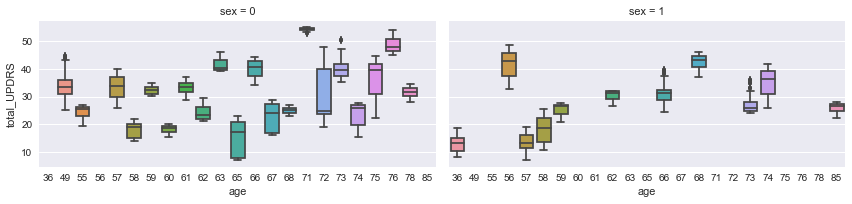

In [6]:
ax=sns.factorplot(x="age", y="motor_UPDRS", col="sex", data = results, kind="box", size=3, aspect=2)
ax=sns.factorplot(x="age", y="total_UPDRS", col="sex", data = results, kind="box", size=3, aspect=2)


###### Dotplots with grouping by Subject, Age and Sex


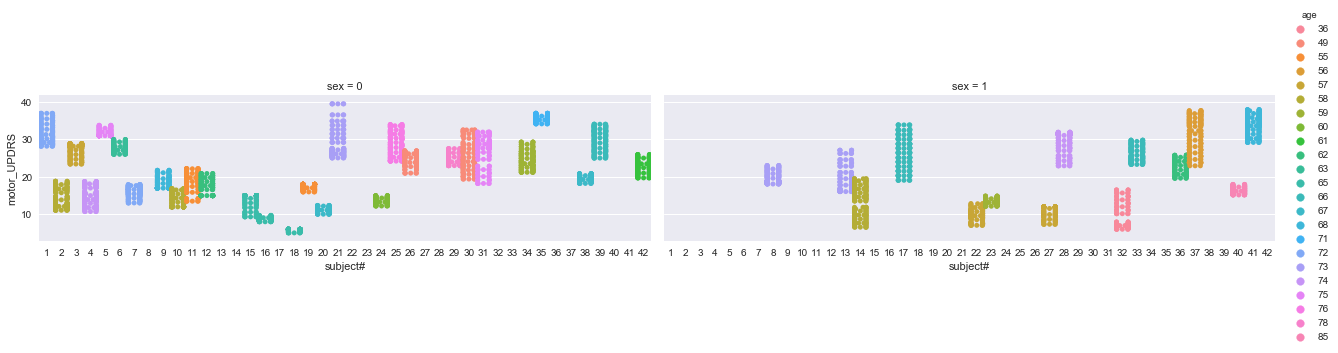

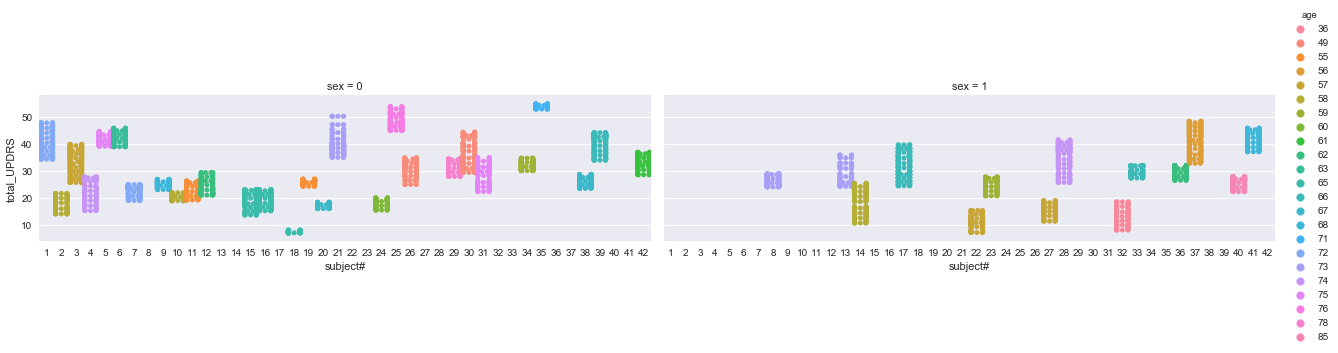

In [7]:
#groupby_subject= results.groupby('subject#')
sns.factorplot(x= 'subject#', y= 'motor_UPDRS', hue='age', col='sex', data=results, kind="swarm", size=3, aspect=3);
sns.factorplot(x= 'subject#', y= 'total_UPDRS', hue='age', col='sex', data=results, kind="swarm", size=3, aspect=3);

col_0     count
subject#       
1           149
2           145
3           144
4           137
5           156
6           156
7           161
8           150
9           152
10          148
11          138
12          107
13          112
14          136
15          143
16          138
17          144
18          126
19          129
20          134
21          123
22          112
23          138
24          156
25          144
26          130
27          129
28          134
29          168
30          126
31          130
32          101
33          135
34          161
35          165
36          129
37          140
38          149
39          143
40          142
41          165
42          150


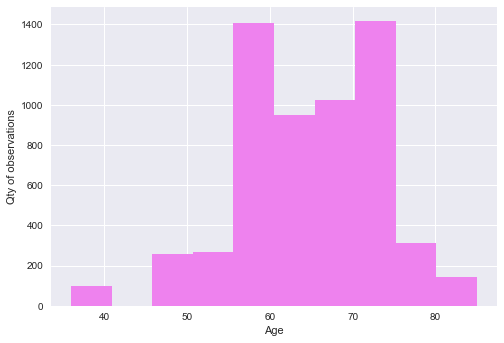

col_0  count
age         
36       101
49       256
55       267
56       140
57       385
58       429
59       299
60       156
61       150
62       236
63       156
65       407
66       422
67       283
68       317
71       165
72       310
73       385
74       271
75       286
76       144
78       168
85       142


In [9]:
tab_1 = pd.crosstab(index=results["subject#"], columns="count") 
print(tab_1)
tab_2 = pd.crosstab(index=results["age"], columns="count") 
plt.hist(results['age'], color="violet")
plt.ylabel('Qty of observations');
plt.xlabel('Age')
plt.show()
print(tab_2)
